# Airbnb Data Analysis

### 1-1 The distribution of the hosts based on annual income from Airbnb in Berlin

### Assumptions
Annual imcome could be estimated by using booked price and number of bookings. However, no booking data was provided by Airbnb. Therefore, we can approximitely calculate the income with average price and number of bookings. The number of bookings could be estimated by 'minimum nights per booking' and 'number of reviews per month'.
##### Annual Income = average_price x minimum_nights x number_of_reviews_per_month x12
* average_price: calculate average price throughout the whole year from calendar.csv datasets.
* minimum_nights: Assume all the guests stayed at least minimum_nights, data from listings.csv.
* number_of_reviews_per_month: Assume most of the guests wrote a review for the booking. 

##### Deal with exceptions:
* average_price: Not all the listings in the calendar datasets. Used 'price' columns in listings.csv, if could not find listings in calendar datasets.
* minimum_nights: Many data points have large value of minimum_nights, which might not be set properly by the host. Based on the distribution of minimum_nights values, the value was adjusted to 5 if minimum_nights >5 (see details in the code). 

##### See detail explainations in the validation section

##### Limitation
* Annual income could be under extimated for some listings since the minimum_nights might be shorter than actual stay; the review records would be smaller than actual booking because not all the user leave their reviews after booking.

* The average price might not correctly represent average income for annual booking because some of the listings have high variance in the price throughout the year.

* Data from some listings are outliers of the distributions, it might not the correct actual host data.

### Visualisation 

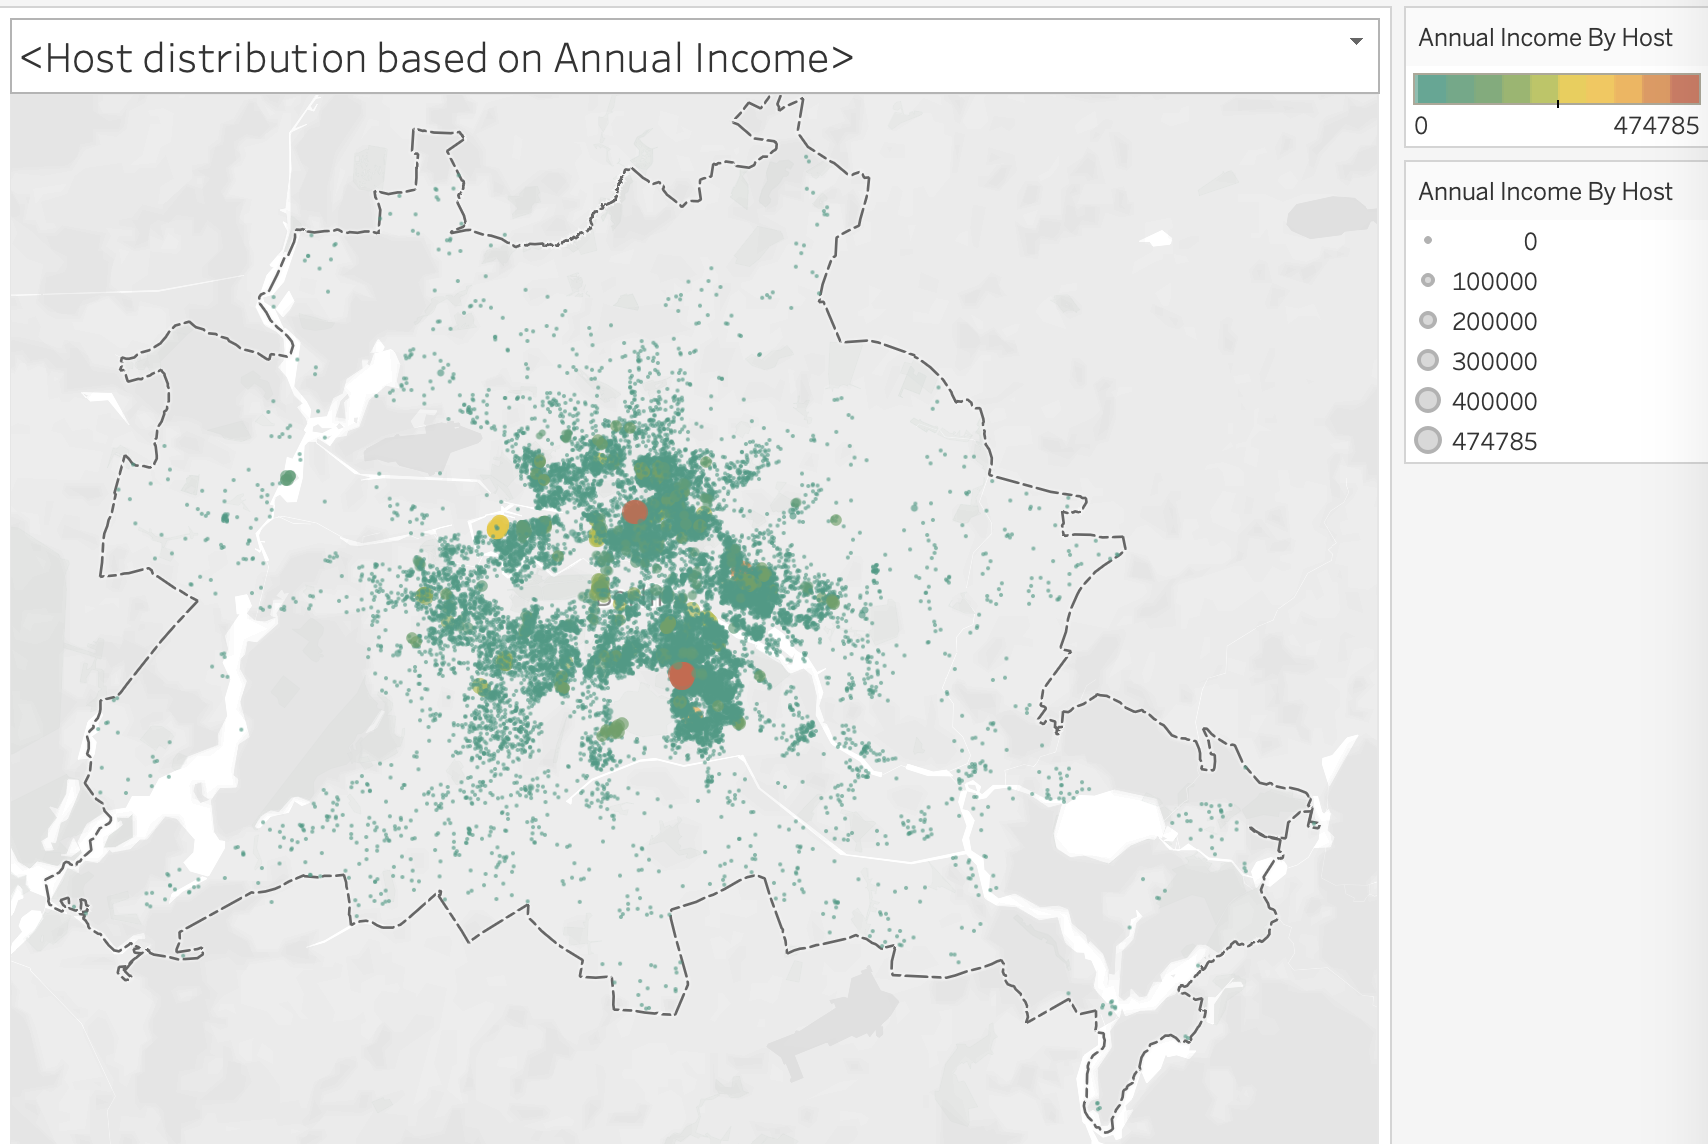

In [1]:
from IPython.display import Image
Image(filename='img/a1.png',width=800, height=600)
# <img src="img/a1.png" width=800, height=600>

<img src="img/a2.png" width=600, height=400>

<img src="img/a3.png" width=600, height=400>

##### Zoom in: filtered out outliers

<img src="img/a4.png" width=600, height=400>

<img src="img/a5.png" width=600, height=400>

<img src="img/a6.png" width=600, height=400>

<img src="img/a7.png" width=600, height=400>

### Validate assumptions

In [8]:
import numpy as np
import pandas as pd

# read datasets
berlin = 'Berlin Airbnb Dataset'
calendar = pd.read_csv(berlin+"/calendar.csv")
listings = pd.read_csv(berlin+"/listings.csv")
reviews = pd.read_csv(berlin+"/reviews.csv")

In [9]:
print('calendar dataset date range:', calendar.date.min(), calendar.date.max())
print('review dataset date range:', reviews.date.min(), reviews.date.max())

calendar dataset date range: 2018-11-07 2019-11-08
review dataset date range: 2009-06-20 2018-11-07


### Explore prices in the calender dataset

In [10]:
import re

prices = calendar.dropna() #filter out null values
prices['price_numeric'] = prices.price.apply(lambda x: float(re.sub('[$,]', '', x))) # str -> numeric
price_by_listing = prices.groupby('listing_id').agg({'price_numeric':['mean', 'max', 'min', 'std']})['price_numeric'].reset_index()
price_by_listing.head()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,listing_id,mean,max,min,std
0,2015,81.900709,188.0,76.0,24.344933
1,3176,90.000000,90.0,90.0,0.000000
2,3309,27.131313,30.0,26.0,1.804535
3,7071,44.384615,45.0,44.0,0.496139
4,9991,180.000000,180.0,180.0,0.000000


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Check the  standard deviation of the price for each listings, and remove the average price if it shows highly spread standard deviation 

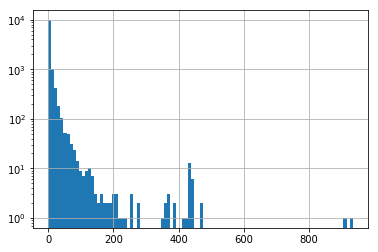

In [12]:
price_by_listing['std'].fillna(0).hist(bins=100)
plt.yscale('log')
plt.show()

In [13]:
avg_price = price_by_listing[price_by_listing['std']<200][['listing_id','mean']]
print(avg_price['mean'].describe())
avg_price.head()

count    11551.000000
mean        75.168344
std        140.735667
min          9.000000
25%         38.000000
50%         55.000000
75%         85.000000
max       8600.000000
Name: mean, dtype: float64


,listing_id,mean
0,2015,81.900709
1,3176,90.000000
2,3309,27.131313
3,7071,44.384615
4,9991,180.000000


### Explore reviews dataset

In [14]:
from datetime import datetime
reviews['date'] = pd.to_datetime(reviews.date)
reviews_filtered = reviews[reviews['date'] > pd.to_datetime('2017-11-07')]
n_reviews = reviews_filtered.groupby(['listing_id']).size()
print(n_reviews.shape[0])

13646


### Explore listings dataset

In [15]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [16]:
listings_df = listings[['id', 'host_id','latitude', 'longitude','property_type','room_type','accommodates','minimum_nights', 'reviews_per_month', 'price']]
listings_df['price'] = listings_df.price.apply(lambda x: float(re.sub('[$,]', '', x))) # str -> numeric
print(listings_df.shape)
print(listings_df.isna().sum())
listings_df.head()

(22552, 10)
id                      0
host_id                 0
latitude                0
longitude               0
property_type           0
room_type               0
accommodates            0
minimum_nights          0
reviews_per_month    3914
price                   0
dtype: int64


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,id,host_id,latitude,longitude,property_type,room_type,accommodates,minimum_nights,reviews_per_month,price
0,2015,2217,52.534537,13.402557,Guesthouse,Entire home/apt,3,4,3.76,60.0
1,2695,2986,52.548513,13.404553,Apartment,Private room,2,2,1.42,17.0
2,3176,3718,52.534996,13.417579,Apartment,Entire home/apt,4,62,1.25,90.0
3,3309,4108,52.498855,13.349065,Apartment,Private room,2,5,0.39,26.0
4,7071,17391,52.543157,13.415091,Apartment,Private room,2,2,1.75,42.0


#### If average price does not found, use 'price' columns in listings.

In [17]:
NaN_avg_price = pd.merge(listings_df, avg_price, how='left', left_on='id', right_on='listing_id')['mean'].isna()
price = listings_df[NaN_avg_price][['id','price']].rename(columns={'id':'listing_id', 'price':'mean'})
all_price = pd.concat([avg_price, price]).rename(columns={'mean':'avg_price'})
p1_df = pd.merge(listings_df, all_price, how='left', left_on='id', right_on='listing_id')
p1_df.head()

,id,host_id,latitude,longitude,property_type,room_type,accommodates,minimum_nights,reviews_per_month,price,listing_id,avg_price
0,2015,2217,52.534537,13.402557,Guesthouse,Entire home/apt,3,4,3.76,60.0,2015,81.900709
1,2695,2986,52.548513,13.404553,Apartment,Private room,2,2,1.42,17.0,2695,17.000000
2,3176,3718,52.534996,13.417579,Apartment,Entire home/apt,4,62,1.25,90.0,3176,90.000000
3,3309,4108,52.498855,13.349065,Apartment,Private room,2,5,0.39,26.0,3309,27.131313
4,7071,17391,52.543157,13.415091,Apartment,Private room,2,2,1.75,42.0,7071,44.384615


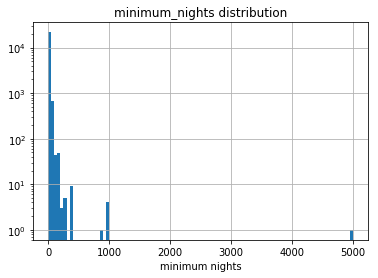

count    22552.000000
mean         7.157059
std         40.665073
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max       5000.000000
Name: minimum_nights, dtype: float64


In [18]:
p1_df.minimum_nights.hist(bins=100)
plt.title('minimum_nights distribution')
plt.xlabel('minimum nights')
plt.yscale('log')
plt.show()
print(p1_df.minimum_nights.describe())

#### Minimun_nights values contain some outliers. Found out 5 is the approximate average value based on the distribution.

count    22220.000000
mean         5.021962
std          9.603479
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         89.000000
Name: minimum_nights, dtype: float64


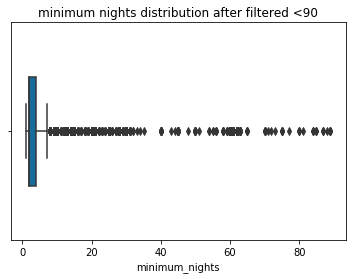

In [19]:
bplot = sns.boxplot(x=p1_df[p1_df['minimum_nights']<90].minimum_nights, width=0.5, palette="colorblind")
bplot.set_title('minimum nights distribution after filtered <90')
print(p1_df[p1_df['minimum_nights']<90].minimum_nights.describe())

In [20]:
p1_df['min_nights_new'] = p1_df['minimum_nights'].apply(lambda x: x if x<5 else 5)

#### Annual income of listings

In [21]:
problem_1 = p1_df.fillna(0).drop(['price','minimum_nights','listing_id'], axis=1)
problem_1['annual_income']= problem_1.avg_price * problem_1.min_nights_new * problem_1.reviews_per_month * 12
problem_1.head()

,id,host_id,latitude,longitude,property_type,room_type,accommodates,reviews_per_month,avg_price,min_nights_new,annual_income
0,2015,2217,52.534537,13.402557,Guesthouse,Entire home/apt,3,3.76,81.900709,4,14781.440000
1,2695,2986,52.548513,13.404553,Apartment,Private room,2,1.42,17.000000,2,579.360000
2,3176,3718,52.534996,13.417579,Apartment,Entire home/apt,4,1.25,90.000000,5,6750.000000
3,3309,4108,52.498855,13.349065,Apartment,Private room,2,0.39,27.131313,5,634.872727
4,7071,17391,52.543157,13.415091,Apartment,Private room,2,1.75,44.384615,2,1864.153846


#### Annual income by host

In [22]:
income_by_host = problem_1.groupby('host_id').agg({'annual_income':'sum'}).reset_index()\
                                        .rename(columns={'annual_income':'annual_income_by_host'})
income_by_host.sort_values(by=['annual_income_by_host'],ascending=False).head()

,host_id,annual_income_by_host
52,102461,474784.601874
9120,28957697,417960.000000
13991,73720108,364800.000000
1693,3003519,273012.817322
17787,167067226,213282.377511


#### Annual income distribution

count     19180.000000
mean       2102.650773
std        8224.372859
min           0.000000
25%          72.192000
50%         518.400000
75%        1892.293636
max      474784.601874
Name: annual_income_by_host, dtype: float64


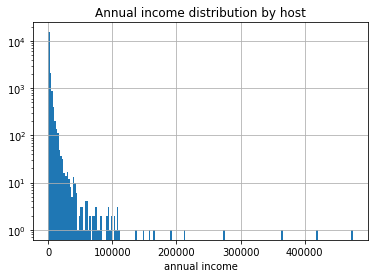

In [23]:
print(income_by_host.annual_income_by_host.describe())

income_by_host.annual_income_by_host.hist(bins=200)
plt.title('Annual income distribution by host')
plt.xlabel('annual income')
plt.yscale('log')
plt.show()

In [24]:
problem_1a = pd.merge(problem_1, income_by_host, how='left', on='host_id')
problem_1a.head()

,id,host_id,latitude,longitude,property_type,room_type,accommodates,reviews_per_month,avg_price,min_nights_new,annual_income,annual_income_by_host
0,2015,2217,52.534537,13.402557,Guesthouse,Entire home/apt,3,3.76,81.900709,4,14781.440000,41098.113370
1,2695,2986,52.548513,13.404553,Apartment,Private room,2,1.42,17.000000,2,579.360000,579.360000
2,3176,3718,52.534996,13.417579,Apartment,Entire home/apt,4,1.25,90.000000,5,6750.000000,6750.000000
3,3309,4108,52.498855,13.349065,Apartment,Private room,2,0.39,27.131313,5,634.872727,634.872727
4,7071,17391,52.543157,13.415091,Apartment,Private room,2,1.75,44.384615,2,1864.153846,1864.153846


In [25]:
problem_1a.to_csv("problem1a.csv", index=False) # save as csv for tableau visualisation 

### 1-2 Explain pricing and impact of seasonality in the context of Airbnb Berlin?


* The availability has no huge difference between seasons.
* However, the price shows seasonality: June to October show low price, and the price go up from November, it goes up to the highest in December which could be tripled than October.

In [26]:
from datetime import datetime
calendar['date'] = pd.to_datetime(calendar.date)
calendar.price.fillna('-1', inplace=True) # NaN-> -1
calendar['price'] = calendar.price.apply(lambda x: float(re.sub('[$,]', '', x))) # str -> numeric
calendar.groupby('available')['listing_id'].count()

available
f    6430639
t    1800841
Name: listing_id, dtype: int64

In [27]:
calendar.to_csv('problem1b.csv')

<img src="img/b1.png" width=600, height=400>

<img src="img/b2.png" width=600, height=400>

### 1-3 Some Berlin listings seems anomalous, can you structurally find these anomalies?

Some listings show extremly high prices.

# 2. Rank the Berlin listings
Design a normalized listing ranking system which would allow users seeking Airbnb services (or
even Airbnb marketplace team) to get a comparative holistic view of the Berlin listings.
For the ranking, please consider an holistic approach (it cannot be an univariate model). For
example: you can consider host attributes, listing’s price, distance to important locations etc.

Location: tourist places(tourism type), restaurant, bus/train
all three highest

In [30]:
ranking_features = listings[['id','host_id','host_response_time', 'host_response_rate',
                             'host_is_superhost','host_has_profile_pic', 'host_identity_verified',
                                'number_of_reviews','review_scores_rating',
                                'review_scores_accuracy', 'review_scores_cleanliness',
                                'review_scores_checkin', 'review_scores_communication',
                                'review_scores_location', 'review_scores_value']]
ranking_features.head()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,2015,2217,within an hour,96%,t,t,t,118,93.0,10.0,9.0,10.0,10.0,10.0,9.0
1,2695,2986,NaN,NaN,f,t,t,6,100.0,10.0,10.0,10.0,10.0,10.0,10.0
2,3176,3718,within a day,100%,f,t,t,143,92.0,9.0,9.0,9.0,9.0,10.0,9.0
3,3309,4108,NaN,NaN,f,t,t,25,88.0,9.0,9.0,9.0,10.0,9.0,9.0
4,7071,17391,within an hour,100%,t,t,t,197,96.0,10.0,10.0,10.0,10.0,10.0,9.0


In [31]:
print(ranking_features.shape)
ranking_features.isna().sum()

(22552, 15)


id                                 0
host_id                            0
host_response_time             12894
host_response_rate             12895
host_is_superhost                 26
host_has_profile_pic              26
host_identity_verified            26
number_of_reviews                  0
review_scores_rating            4389
review_scores_accuracy          4414
review_scores_cleanliness       4411
review_scores_checkin           4432
review_scores_communication     4418
review_scores_location          4431
review_scores_value             4435
dtype: int64

## 3. London, United Kingdom vs Paris, France

* Assume the Airbnb guests might be tourists, estimate the number of Airbnb guests stayed in the city.
* Use number of guests(guests_included) for each listing and number of bookings(estimated by using reviews_per_month) to calculate the number of guests.
* The result below shows the estimated annual number of Airbnb guests  
 * Estimated number of guests of Airbnb in London:  1356831.12
 * Estimated number of guests of Airbnb in Paris:  1032772.2
* the number of Airbnb guests in London is 1.31 times than the one in Paris while the number of Tourists in London is 1.11 times than the tourists in Paris.
 * Airbnb guests - London > Paris:  1.31
 * Tourists - London > Paris:  1.11
* However, in the Airbnb data, more listings in London than Paris, it is approximately 1.35 times.

* Therefore, although the Airbnb data looks related to the number of tourists in these two cities, we could not make assumption with these small part of the dataset. 

In [32]:
london = pd.read_csv('Comparative Market Analysis Dataset/London 05 June 2019.csv')
paris = pd.read_csv('Comparative Market Analysis Dataset/Paris 05 June 2019.csv')

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [33]:
print('number of listings in London: ',london.shape[0])
print('number of listings in Paris: ', paris.shape[0])

number of listings in London:  82029
number of listings in Paris:  60822


In [34]:
paris.columns[0:50], paris.columns[50:107]

(Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
        'space', 'description', 'experiences_offered', 'neighborhood_overview',
        'notes', 'transit', 'access', 'interaction', 'house_rules',
        'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
        'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
        'host_about', 'host_response_time', 'host_response_rate',
        'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
        'host_picture_url', 'host_neighbourhood', 'host_listings_count',
        'host_total_listings_count', 'host_verifications',
        'host_has_profile_pic', 'host_identity_verified', 'street',
        'neighbourhood', 'neighbourhood_cleansed',
        'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
        'smart_location', 'country_code', 'country', 'latitude', 'longitude'],
       dtype='object'),
 Index(['is_location_exact', 'property_type', 'room_typ

In [35]:
london_guests = london[['guests_included','reviews_per_month']]
london_guests['n_guests'] = london.guests_included * london.reviews_per_month *12

paris_guests = paris[['guests_included','reviews_per_month']]
paris_guests['n_guests'] = paris.guests_included * paris.reviews_per_month *12

print('Estimated number of guests of Airbnb in London: ', round(london_guests.n_guests.sum(), 2))
print('Estimated number of guests of Airbnb in Paris: ', round(paris_guests.n_guests.sum(), 2))

print('Airbnb guests - London > Paris: ', round(london_guests.n_guests.sum()/paris_guests.n_guests.sum(), 2))
print('Tourists - London > Paris: ', round(20000000/18000000, 2))
print('However, more Airbnb listings in London than Paris: ', round(london.shape[0]/paris.shape[0], 2))

Estimated number of guests of Airbnb in London:  1356831.12
Estimated number of guests of Airbnb in Paris:  1032772.2
Airbnb guests - London > Paris:  1.31
Tourists - London > Paris:  1.11
However, more Airbnb listings in London than Paris:  1.35


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


###  Inferential Statistics: 
According to expatistan [3], London is 20% more expensive than
France. What do you think from the Airbnb dataset (Careful with the assumptions, make
sure to validate assumptions before performing hypothesis testing).

#### Assumption: 
Price on the Airbnb could reflect accomodation price in the city. We could compare the prices of the listings in these two cities.
#### Show Distribution of the price in each city.
#### Result
Based on the result, the prices in London are more spread out than Paris which means London have many lower price accomodation, at the same time it has some much higher price accomodation as well while the prices in Paris are more normal distributed. 

Therefore, it could not give a conclusion that London is more expensive than Paris.

In [36]:
london_price = london.price.apply(lambda x: float(re.sub('[$,]', '', x))) # str -> numeric
paris_price = paris.price.apply(lambda x: float(re.sub('[$,]', '', x))) # str -> numeric

In [37]:
print('London prices: \n',london_price.describe())
print('\nParis prices: \n',paris_price.describe())

London prices: 
 count    82029.000000
mean       118.943715
std        214.371348
min          0.000000
25%         45.000000
50%         80.000000
75%        135.000000
max      13700.000000
Name: price, dtype: float64

Paris prices: 
 count    60822.000000
mean       116.982884
std        164.186807
min          0.000000
25%         60.000000
50%         80.000000
75%        120.000000
max       9379.000000
Name: price, dtype: float64


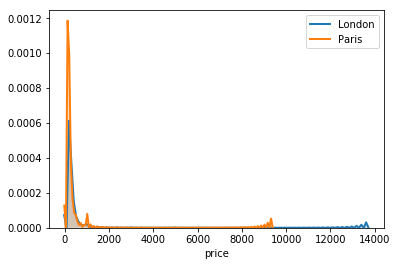

In [38]:
sns.distplot(london_price,hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 2}, label = 'London')
sns.distplot(paris_price, hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 2}, label = 'Paris')

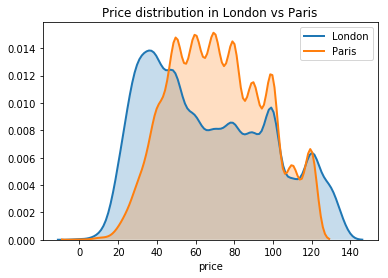

In [39]:
sns.distplot(london_price[london_price<=135],hist = False, kde = True, 
             kde_kws = {'shade': True, 'linewidth': 2}, label = 'London') \
            .set_title('Price distribution in London vs Paris')
sns.distplot(paris_price[paris_price<=120], hist = False, kde = True,
             kde_kws = {'shade': True, 'linewidth': 2}, label = 'Paris')


([<matplotlib.axis.XTick at 0x1a66257d30>,
 <a list of 2 Text xticklabel objects>)

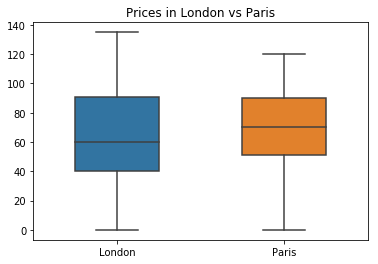

In [40]:
sns.boxplot(data=[london_price[london_price<=135], paris_price[paris_price<=120]], width=0.5)\
        .set_title('Prices in London vs Paris')
plt.xticks([0,1], ['London', 'Paris'])

### (c) Optional: Any other comparative study you want to perform?

#### Compare the property type and room type of the listings in London and Paris

##### Property type

<img src="img/3-1.png" width=600, height=400>

##### Room type

<img src="img/3-2.png" width=600, height=400>

In [43]:
# London
london_property_type = london.property_type.value_counts().reset_index()\
                        .rename(columns={'property_type':'London','index':'property_type'})
london_property_type['London%'] = round(london_property_type.London/london.shape[0]*100,4)
# Paris
paris_property_type = paris.property_type.value_counts().reset_index()\
                        .rename(columns={'property_type':'Paris','index':'property_type'})
paris_property_type['Paris%'] = round(paris_property_type.Paris/paris.shape[0]*100, 4)
# Merge
property_type = pd.merge(london_property_type, paris_property_type, how='outer', on='property_type')
property_type.head(10)

,property_type,London,London%,Paris,Paris%
0,Apartment,55523.0,67.6870,54650.0,89.8524
1,House,16868.0,20.5635,466.0,0.7662
2,Townhouse,3009.0,3.6682,245.0,0.4028
3,Serviced apartment,2135.0,2.6027,489.0,0.8040
4,Bed and breakfast,900.0,1.0972,288.0,0.4735
5,Condominium,898.0,1.0947,1726.0,2.8378
6,Loft,719.0,0.8765,1192.0,1.9598
7,Guest suite,351.0,0.4279,42.0,0.0691
8,Guesthouse,269.0,0.3279,102.0,0.1677
9,Hostel,232.0,0.2828,57.0,0.0937


In [44]:
property_type.to_csv('problem3c.csv', index=False)

In [45]:
# London
london_room_type = london.room_type.value_counts().reset_index()\
                        .rename(columns={'room_type':'London','index':'room_type'})
london_room_type['London%'] = round(london_room_type.London/london.shape[0]*100,4)
# Paris
paris_room_type = paris.room_type.value_counts().reset_index()\
                        .rename(columns={'room_type':'Paris','index':'room_type'})
paris_room_type['Paris%'] = round(paris_room_type.Paris/paris.shape[0]*100, 4)
# Merge
room_type = pd.merge(london_room_type, paris_room_type, how='outer', on='room_type')
room_type.head(10)

,room_type,London,London%,Paris,Paris%
0,Entire home/apt,45936,55.9997,52571,86.4342
1,Private room,35326,43.0653,7787,12.8029
2,Shared room,767,0.9350,464,0.7629


In [46]:
room_type.to_csv('problem3c_2.csv', index=False)